# MVP - Sprint 03
# Engenharia de Dados - Pipeline de Dados em Nuvem
# Higor Morais Devellard


##Índice

![imagem](/files/tables/indice.jpg)

## 1.Objetivo

Nesse trabalho será criado um pipeline de dados utilizando a plataforma de computação em nuvem da Microsoft Azure, utilizado dados abertos do ONS(Operador Nacional do Sistema Elétrico) para realizar a busca, coleta, modelagem, carga e análise de dados.

O objetivo deste trabalho é utilizar os dados extraídos do portal do ONS e gerar visualizações que descrevam o comportamento de usinas hidrelétricas do Brasil. Os desafios propostos serão descritos no item 7.0 deste trabalho.

Serão analisados atributos como geração de energia por usina hidrelétrica ou por subsistema de geração, altura do nível de água e volume de reservatórios, além de analisar a capacidade instalada de geração de energia.

## 2.Busca e Coleta de Dados

Foi utilizado o acervo de dados abertos do ONS para responder perguntas pertinentes sobre a geração de energia das usinas hidrelétricas que estão em operação no Brasil.

Os dados estão disponíveis no site do ONS no seguinte endereço: https://www.ons.org.br/paginas/resultados-da-operacao/historico-da-operacao/dados-gerais


**Dados de Geração de Energia**
https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/geracao_energia.aspx

**Dados de Capacidade Instalada de Geração**
https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/capacidade_instalada.aspx

**Dados Sobre o Nível de Àgua nos Reservatórios das Usinas Hidrelétricas**
https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/dados_hidrologicos_niveis.aspx

**Dados Sobre o Volume do Reservatório nas Usinas**
https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/dados_hidrologicos_volumes.aspx




## 3.Modelagem dos Dados


Com o intuito de fazer uma análise mais aprofundada dos dados coletados, foi selecionado os dados mais relevantes. Uma vez selecionada as tabelas, foi definido a tabela "Fato" e as tabelas "Dimensões" considerando as principais métricas.

A figura abaixo exemplifica como ficou dividido as tabelas no **esquema estrela**:

![imagem](/files/tables/Fato_e_dimensoes.jpeg)

## 4.Catalogo de Dados


Para catagolar os dados presentes nos datasets que são necessários para responder às perguntas que serão feitas nesse projeto, inicialmente seria feito pela própria ferramenta de catalogo do databricks, conforme **imagem abaixo**, porém, devido a um problema de falta de autorização para realizar os comentários, foi optado por descrever manualmente utilizando o Markdown deste notebook.



![imagem](/files/tables/catalogos.jpeg)

Descrição dos atributos presentes nos datasets utilizados:

**Nom_Usina:** Retorna o nome da usina hidrelétrica.

**Tipo_Reservatorio:** Retorna o tipo de reservatório podendo ser do tipo "Fio d'agua" ou "Reservatório com usina"

**Codigo_Aneel:** Retorna o código de identificação da usina usado pela Agência Nacional de Energia Elétrica (ANEEL)

**id_subsistema:** Retorna o id de identificação do subsistema podendo ser "S", "SE", "N", 'NE"

**Subsistema:** Retorna o subsistema que a usina hidrelétrica pertence, podendo ser do subsistema "Sul","Sudeste/Centro-Oeste", "Norte" e "Nordeste".

**Nom_Bacia:** Retorna o nome da bacia hidrográfica no qual o reservatório da usina hidrelétrica está localizada.

**inicio_operacao:** Retorna a data em que a usina hidrelétrica iniciou as suas operações.

**val_volmax(m3):** Retorna o volume máximo do reservatório em metros cúbicos.

**val_volmin(m3):** Retorna o volume mínimo do reservatório em metros cúbicos.

**val_latitude:** Retorna a latitude em que está localizada a usina.

**val_longitude:** Retorna a longitude em que está localizada a usina.

**Data:** Retorna a data em que foi registrado determinada informação, a data é registada mensalmente no formato "dd/mm/yyyy".

**Capacidade_instalada(MW):** Retorna a capacidade instalada da usina hidrelétrica, a capacidade instalada informa o quanto a usina pode gerar em MW.

**Vazão_Afluente(m³/s):** Retorna a vazão afluente do reservatório em m³/s. A vazão afliente é fluxo de água que entra em uma determinada área ou ponto em um corpo d'água, como um rio, lago ou reservatório. Essa água que entra é geralmente composta pela combinação de diferentes fontes de contribuição, é um atributo importante para se determinar o quanto de água irá entrar entrar na usina hidrelétrica.

**Geração_De_Energia(Mwmedio):** Retorna o valor gerado de energia em MWmedio de cada usina ou subsistema.

**Val_Volume_Útil(%):** Retorna o volume útil do reservatório podendo assumir valores negativos, que indicam que o reservatório está abaixo do que pode ser usado para gerar energia ou acima de 100%, o que indica que o excedente deverá ser usado liberado pela usina.

**Val_Nivel_montante(m):** Retona o nível montante de água no reservatório, o valor será retornado em metros.


## 6.Processamento de Dados

### 6.1.Azure Blob Storage

Nesta etapa do projeto que se segue após a catalogação onde foi explicado cada atributo presente nos datasets, seguiremos para o processamento de dados.
Será apresentado as transformações que foram necessárias em cada tabela obtida. Para realizar as transformações foi utilizado a plataforma do Microsoft Azure. Onde inicialmente os dados foram carregados no "Blob Storage", conforme imagem abaixo do container criado:


![imagem](/files/tables/blob_storage.jpg)

### 6.2.Azure Data Factory

Em seguida foi utilizado o "Azure Data Factory" para realizar as transformações dos dados junto com o "Azure SQL Database" para a criação das tabelas do Data Warehouse e realizar as análises que serão feitas no final deste trabalho.
Cada tabela teve os seus dados tratados para que pudessem ser usados na próxima etapa de análise, um exemplo abaixo ilustra como foi feita  essa tratativa:

![imagem](/files/tables/azure.jpeg)

Os dados armazenados foram inseridos no Azure Data Factory, conforme imagem abaixo:

![imagem](/files/tables/dados_data_factory.jpg)

Após os dados armazenados no Azure Data Factory, foi criado o fluxo de dados conforme a imagem abaixo, no exemplo ilustrado foi usado duas tabelas inicialmente, a que representa as caracteristicas das usinas, dataset "Usinas" e a de geração de energia "Source1", nessas duas tabelas foi definido inicialmente a projeção de cada atributo, classificando como "String", "date", "integer" ou "float", para facilitar as visualizações que serão feitas mais à frente. 

Em seguida foi selecionado os atributos necessários para visualização "select1" e "select2". Logo após, foi realizado um join que iria juntar as duas tabela em uma só tendo como coluna comum, o atributo "Nom_usina" e em seguida foi exportado os dados para o "AzureSqlTable1" 

![imagem](/files/tables/exemplo_dataflow.jpg)

Por último, foi criado os pipelines que irão fazer a orquestração de dados na plataforme do Azure. Os pipelines irão criar, agendar e orquestrar os fluxos de trabalho de processamento de dados, transformar os dados e armazenar em um destino, que no caso será o próprio container do Blob storage. O exemplo abaixo ilustra a criação de um dos pipelines usados que irão gerar uma tabela.dbo, ou seja, uma tabela de banco de dados que pertence ao esquema padrão dbo.

![imagem](/files/tables/pipeline.jpg)

### 6.3.Data Bricks

Para a última etapa deste projeto, será usado o Data Bricks, que é uma plataforma de análise de dados e processamento big data também baseada em nuvem que permite um ambiente integrado para análise de dados. O Databricks é construído em cima do Apache Spark, um framework de processamento de dados em memória e distribuído. Isso torna o Databricks ideal para tarefas como ETL (Extração, Transformação e Carga), análise de dados, processamento em lote e em tempo real, machine learning e muito mais. A imagem abaixo ilustra  como foi desenvolvido esse projeto em um notebook criado dentro do databricks para a análise de dados:

![imagem](/files/tables/databricks.jpg)

## 7.Solução de Problemas

### 7.1.Perguntas

**Pergunta 01** - Quais Usinas hidreletricas já estavam em operação no Brasil antes de 1980 e pertencem ao subistema Sul e informe qual bacia hidrográfica que fornece água para a usina?

**Pergunta 02** - Utilize algum componente gráfico para descrever o comportamento geração de energia por subsistema ao longo dos anos e comente.

**Pergunta 03** - Como está relacionada a capacidade instalada com a geração de energia em MW para o subsistema Sudeste/Centro-Oeste?

**Pergunta 04** - Considerando a Usina de "Ilha Solteira" e a Usina "Água Vermelha", Construa um gráfico que correlacione as duas usinas quanto ao volume útil do reservatório e a vazão afluente dos reservatórios.

**Pergunta 05** - Considerando a usina de Tucurui mostre como se relaciona os dados de volume útil do reservatório e a altura do nível de água do reservatório. Mostre a densidade dos registros.

### 7.2.Soluções

#### 7.2.1.Solução Pergunta 01

**Preparação do Dataset**

In [0]:
#Bibliotecas Usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Realizando a conexão com o Blob Storage para poder acessar os dados.
storage_account_name = "hdevellardstorage"
storage_account_access_key = "pLK0+956XdjHhKmXqq64S8HMfIQ8/zjiaMKRKVCgr50jmfuZ49oy4LpxxxxxxxxxTkD1WgWJse1+AStdFEmJw=="
# key alterada para evitar risco de utilização.

In [0]:
#Definindo a localização da pasta e tipo de extensão.
file_location = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Usinas.csv"
file_type = "csv"

In [0]:
#configurando propriedades no ambiente de execução do Apache Spark para interagir com o serviço de armazenamento do Microsoft Azure Blob Storage.
spark.conf.set(
  "fs.azure.account.key."+storage_account_name+".blob.core.windows.net",
  storage_account_access_key)

In [0]:
  #Criação do dataset
  df_pergunta_01 = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location)

In [0]:
# Converte o DataFrame do PySpark em um DataFrame do Pandas
df_pergunta_01 = df_pergunta_01.toPandas()

In [0]:
display(df_pergunta_01)

Nom_Usina,Tipo_Reservatorio,Codigo_Aneel,id_subsistema,Subsistema,Nom_Bacia,Inicio_operacao,val_volmax(m3),val_volmin(m3),val_latitude,val_longitude
14 DE JULHO,Fio d'agua,UHE.PH.RS.000012-4.01,S,SUL,JACUI,2008-12-25,55.180,50.470,-2.906.944.444,-5.167.527.778
A. VERMELHA,Reservatorio com usina,UHE.PH.MG.000041-8.01,SE,SUDESTE/CENTRO-OESTE,GRANDE,1978-03-01,11.025.000,5.856.000,-1.986.805.556,-5.034.277.778
AIMORES,Fio d'agua,UHE.PH.MG.000042-6.01,SE,SUDESTE/CENTRO-OESTE,DOCE,2005-07-30,185.520,156.550,-1.945.333.333,-4.109.666.667
B. BONITA,Reservatorio com usina,UHE.PH.SP.000208-9.01,SE,SUDESTE/CENTRO-OESTE,TIETE,1963-02-01,3.135.000,569.000,-2.251.944.444,-4.853.416.667
B.COQUEIROS,Fio d'agua,UHE.PH.GO.028757-1.01,SE,SUDESTE/CENTRO-OESTE,PARANAIBA,2010-06-19,347.800,300.000,-1.872.111.111,-5.100.444.444
BAGUARI,Fio d'agua,UHE.PH.MG.029453-5.01,SE,SUDESTE/CENTRO-OESTE,DOCE,2009-09-09,38.070,31.420,-1.902.916.667,-4.212.972.222
BAIXO IGUACU,Fio d'agua,UHE.PH.PR.030923-0.01,S,SUL,IGUACU,2019-02-08,211.920,178.700,-2.550.305.556,-5.367.805.556
BALBINA,Reservatorio com usina,UHE.PH.AM.000190-2.01,N,NORTE,AMAZONAS,1989-02-13,20.006.220,9.711.900,-1.913.611.111,-5.947.388.889
BARIRI,Fio d'agua,UHE.PH.SP.000203-8.01,SE,SUDESTE/CENTRO-OESTE,TIETE,1967-01-01,544.000,544.000,-2.215.388.889,-4.875.388.889
BARRA BRAUNA,Fio d'agua,UHE.PH.MG.000215-1.01,SE,SUDESTE/CENTRO-OESTE,PARAIBA DO SUL,2009-12-25,92.550,75.170,-21.45,-42.4


In [0]:
#Verificando a quantidade de linhas e Colunas.
df_pergunta_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nom_Usina          158 non-null    object
 1   Tipo_Reservatorio  158 non-null    object
 2   Codigo_Aneel       158 non-null    object
 3   id_subsistema      158 non-null    object
 4   Subsistema         158 non-null    object
 5   Nom_Bacia          158 non-null    object
 6   Inicio_operacao    158 non-null    object
 7   val_volmax(m3)     158 non-null    object
 8   val_volmin(m3)     158 non-null    object
 9   val_latitude       155 non-null    object
 10  val_longitude      155 non-null    object
dtypes: object(11)
memory usage: 13.7+ KB


**Solução Pergunta 01 - Quais Usinas hidreletricas já estavam em operação no Brasil antes de 1980 e pertencem ao subistema Sul e informe qual bacia hidrográfica que fornece água para a usina?**

In [0]:
%sql
SELECT Nom_Usina, Subsistema, Inicio_operacao, Nom_Bacia
FROM dataset_pergunta_1
WHERE Inicio_operacao < '1980-01-01' AND Subsistema = 'SUL';

Nom_Usina,Subsistema,Inicio_operacao,Nom_Bacia
PASSO FUNDO,SUL,1973-03-21,URUGUAI
PASSO REAL,SUL,1973-01-01,JACUI
SALTO OSORIO,SUL,1975-10-17,IGUACU
G. P. SOUZA,SUL,1970-10-25,CAPIVARI
ITAUBA,SUL,1978-02-01,JACUI
JACUI,SUL,1962-03-01,JACUI
CANASTRA,SUL,1956-04-01,JACUI


**Comentários:** A query retornou apenas as sete usinas que já estavam em operação antes dos anos 80 e que eram pertencentes ao subsistema Sul, também foi informado qual é a bacia hidrográfica que fornece água às usinas.

#### 7.2.2.Solução Pergunta 02

**Preparação do Dataset**

In [0]:
#Localização do dataset no container
file_location_pergunta_2 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/dbo.pergunta_2.csv"

In [0]:
#Configurações Apache Spark
df_pergunta_2_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_2)

In [0]:
#Verificar o dataset
display(df_pergunta_2_spark)

Data,Subsistema,Geração_De_Energia(Mwmedio)
null,Sul,750476
2010-01-01T00:00:00.000+0000,Sul,8337
2010-02-01T00:00:00.000+0000,Sul,9238
2010-03-01T00:00:00.000+0000,Sul,8834
2010-04-01T00:00:00.000+0000,Sul,8337
2010-05-01T00:00:00.000+0000,Sul,9017
2010-06-01T00:00:00.000+0000,Sul,9623
2010-07-01T00:00:00.000+0000,Sul,9699
2010-08-01T00:00:00.000+0000,Sul,9390
2010-09-01T00:00:00.000+0000,Sul,7862


In [0]:
from pyspark.sql.functions import col, to_date

In [0]:
# Converter o atributo "Data" para tipo de data
df_pergunta_2_spark = df_pergunta_2_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))

In [0]:
#Verificando se o problema com a data foi resolvido
display(df_pergunta_2_spark)

Data,Subsistema,Geração_De_Energia(Mwmedio)
null,Sul,750476
2010-01-01,Sul,8337
2010-02-01,Sul,9238
2010-03-01,Sul,8834
2010-04-01,Sul,8337
2010-05-01,Sul,9017
2010-06-01,Sul,9623
2010-07-01,Sul,9699
2010-08-01,Sul,9390
2010-09-01,Sul,7862


In [0]:
# Converte o DataFrame do PySpark em um DataFrame do Pandas
df_pergunta_2 = df_pergunta_2_spark.toPandas()

In [0]:
#Removendo as linhas que realizavam a soma e deixando somente valores mensais de geração.
df_pergunta_2 = df_pergunta_2.dropna(subset=['Data'])

**Solução Pergunta 02** - Utilize algum componente gráfico para descrever o comportamento geração de energia por subsistema ao longo dos anos e comente.

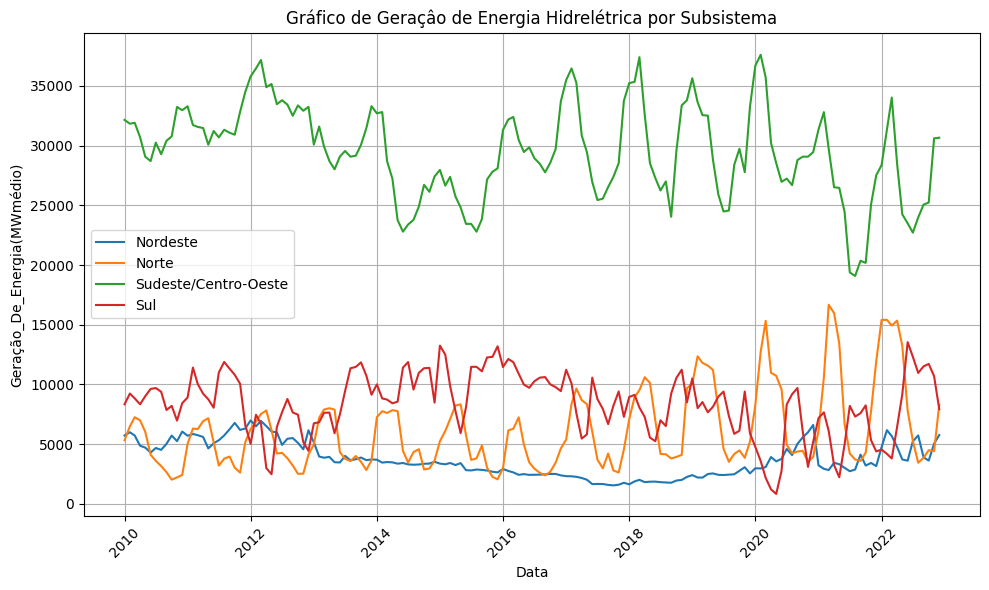

In [0]:
# Agrupe os dados por "Subsistema"
grupos = df_pergunta_2.groupby('Subsistema')

# Crie um gráfico de linhas para cada grupo (subsistema)
plt.figure(figsize=(10, 6))  # Defina o tamanho da figura

for nome_grupo, grupo in grupos:
    plt.plot(grupo['Data'], grupo['Geração_De_Energia(Mwmedio)'], label=nome_grupo, linestyle='-')

# Adicione rótulos aos eixos e um título ao gráfico
plt.xlabel('Data')
plt.ylabel('Geração_De_Energia(MWmédio)')
plt.title('Gráfico de Geraçâo de Energia Hidrelétrica por Subsistema')

# Adicione uma legenda para as linhas (subsistemas)
plt.legend()

# Rotacione os rótulos do eixo x para melhorar a legibilidade, se necessário
plt.xticks(rotation=45)

# Exiba o gráfico
plt.grid(True)  # Adicione uma grade ao gráfico
plt.tight_layout()  # Ajuste automaticamente os espaçamentos para evitar cortes de rótulos
plt.show()

Com o gráfico acima, é possível afirmar que o subsistema Sudeste/Centro Oeste é o que ao longo do tempo mais gerou e gera energia no Brasil, sendo o subsistema de maior importância para o país, lembrando que a usina Hidrelétrica de Itaipu está presente neste subsistema. 

Também é possível perceber que uma evolução do nível de geração de energia das hidrelétricas do subsistema Norte, representado pela cor laranja que em 2021 quase igualou em termos de geração com o subsistema Sudeste/Centro-Oeste.

#### 7.2.3.Solução Pergunta 03

**Preparação do Dataset**

In [0]:
#Será necessário juntar a informação de dois datasets para que seja possível responder a pergunta 03

file_location_pergunta_3_1 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Comparativo_Capacidade_Instalada_por_subsistema_data.csv"
file_location_pergunta_3_2 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Comparativo_Geração_de_Energia_Semana_por_subsistema.csv"

In [0]:
df_pergunta_3_1_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_3_1)
df_pergunta_3_2_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_3_2)

In [0]:
# Converter o atributo "Data" para tipo de data
df_pergunta_3_1_spark = df_pergunta_3_1_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))

In [0]:
df_pergunta_3_2_spark = df_pergunta_3_2_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))

In [0]:
df_pergunta_3_1_spark = df_pergunta_3_1_spark.toPandas()
df_pergunta_3_2_spark = df_pergunta_3_2_spark.toPandas()

In [0]:
df_pergunta_3_1_spark = df_pergunta_3_1_spark.dropna(subset=['Data'])
df_pergunta_3_2_spark = df_pergunta_3_2_spark.dropna(subset=['Data'])

In [0]:
# Substitua as vírgulas por pontos nas colunas relevantes
df_pergunta_3_1_spark['Capacidade_instalada(MW)'] = df_pergunta_3_1_spark['Capacidade_instalada(MW)'].str.replace(',', '.')
df_pergunta_3_2_spark['Geração_De_Energia(Mwmedio)'] = df_pergunta_3_2_spark['Geração_De_Energia(Mwmedio)'].str.replace(',', '.')

In [0]:
# Converta os atributos para float
df_pergunta_3_1_spark['Capacidade_instalada(MW)'] = df_pergunta_3_1_spark['Capacidade_instalada(MW)'].astype(float)
df_pergunta_3_2_spark['Geração_De_Energia(Mwmedio)'] = df_pergunta_3_2_spark['Geração_De_Energia(Mwmedio)'].astype(float)

In [0]:
# Agrupar os dois datasets em um só
dataset_pergunta_3 = pd.merge(df_pergunta_3_1_spark, df_pergunta_3_2_spark, on=['Subsistema', 'Data'])

In [0]:
dataset_pergunta_3.head()

,Subsistema,Data,Capacidade_instalada(MW),Geração_De_Energia(Mwmedio)
0,Sudeste/Centro-Oeste,2010-01-01,50674.6114,32153.83320
1,Sudeste/Centro-Oeste,2010-02-01,50680.5694,31832.08237
2,Sudeste/Centro-Oeste,2010-03-01,50798.7094,31912.25321
3,Sudeste/Centro-Oeste,2010-04-01,50817.7794,30699.21276
4,Sudeste/Centro-Oeste,2010-05-01,50951.7794,29070.98321


**Solução Pergunta 03:** Como está relacionada a capacidade instalada com a geração de energia em MW para o subsistema Sudeste/Centro-Oeste?

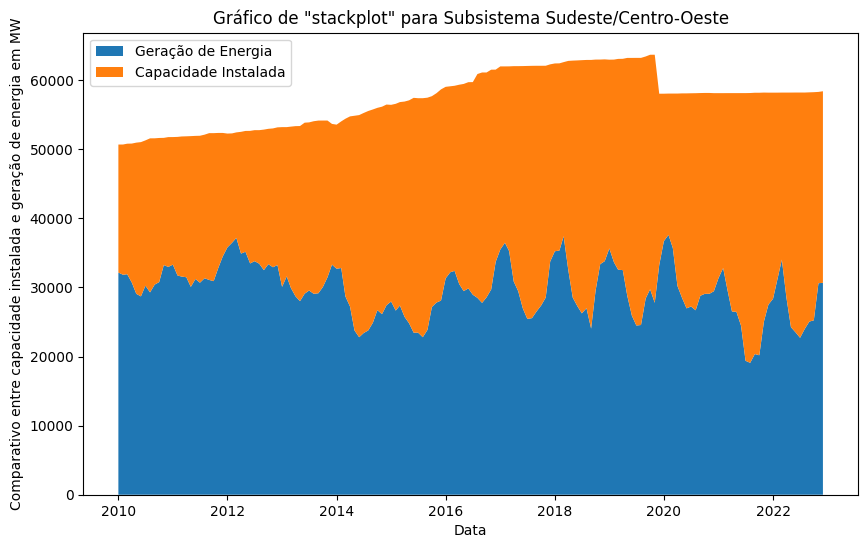

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Passo 1: Filtrar o DataFrame para incluir apenas o Subsistema "Sul"
dataset_sudeste = dataset_pergunta_3[dataset_pergunta_3['Subsistema'] == 'Sudeste/Centro-Oeste']

# Passo 2: Extrair os valores relevantes das colunas
datas = dataset_sudeste['Data']
capacidade_instalada = dataset_sudeste['Capacidade_instalada(MW)']
geracao_energia = dataset_sudeste['Geração_De_Energia(Mwmedio)']

# Passo 3: Criar um novo DataFrame com as colunas desejadas
dataframe_modificado = pd.DataFrame({
    'Geração_De_Energia(Mwmedio)': geracao_energia,
    'Capacidade_instalada(MW)': capacidade_instalada,
    'Geração_Parte_Capacidade(MW)': capacidade_instalada - geracao_energia
})

# Criar o gráfico de "stackplot" com eixo x como "Data" e eixo y com as colunas relevantes
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
plt.stackplot(datas, dataframe_modificado['Geração_De_Energia(Mwmedio)'], dataframe_modificado['Geração_Parte_Capacidade(MW)'],
              labels=["Geração de Energia", "Capacidade Instalada"])

# Adicione rótulos ao gráfico
plt.xlabel('Data')
plt.ylabel('Comparativo entre capacidade instalada e geração de energia em MW')
plt.title('Gráfico de "stackplot" para Subsistema Sudeste/Centro-Oeste')

# Adicione uma legenda ao gráfico
plt.legend(loc='upper left')

# Exiba o gráfico
plt.show()

**Comentário:** Sendo a capacidade instalada de geração por subsistema a soma da capacidade instalada de todos as usinas hidrelétricas pertencentes ao subsistema escolhido. O gráfico acima representa como se comporta a geração de energia ao longo dos anos por meio da hidrelétricas em comparação com a capacidade instalada. O gráfico mostra que a capacidade instalada vem aumentando ao longo dos anos e a geração de energia apresenta uma certa sazonalidade ao longo dos anos.

Uma curiosidade importante que pode favorecer o entendimento desse gráfico é que as usinas não operam com 100% da sua capacidade, a quantidade de turbinas instaladas na usina devem considerar que serão utilizadas apenas em epocas de manutenção de outras turbinas ou são instaladas para que sejam utilizadas em caso de pane em outras turbinas. O gráfico acima mostrando que a capacidade instalada é quase o dobro da geração de enrgia das usinas, indica que há um investimento crescente na infraestrutura das usinas visando estarem preparadas para cenários adversos. 

#### 7.2.4.Solução Pergunta 04

**Preparação do Dataset**

In [0]:
#Será necessário o uso de informações de 03 tabelas para que seja possível responder a pergunta.
file_location_pergunta_4_1 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Comparativo_Dados_Hidrológicos_Mês_data.csv"
file_location_pergunta_4_2 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Comparativo_Nível_Montante_Mês_data.csv"
file_location_pergunta_4_3 = "wasbs://hdevellard@hdevellardstorage.blob.core.windows.net/Comparativo_Volume_Útil_Mês_data.csv"

In [0]:
from pyspark.sql.functions import col, format_number

In [0]:
# Supondo que seu DataFrame seja df_pergunta_3_1_spark
df_pergunta_4_1_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_4_1)
df_pergunta_4_2_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_4_2)
df_pergunta_4_3_spark = spark.read.format(file_type).option("inferSchema", "true").option("delimiter", ";").option("header", "true").load(file_location_pergunta_4_3)

In [0]:
from pyspark.sql.functions import col, to_date

In [0]:
# Converter o atributo "Data" para tipo de data
df_pergunta_4_1_spark = df_pergunta_4_1_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))
df_pergunta_4_2_spark = df_pergunta_4_2_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))
df_pergunta_4_3_spark = df_pergunta_4_3_spark.withColumn("Data", to_date(col("Data"), "dd/MM/yyyy"))

In [0]:
# Converte o DataFrame do PySpark em um DataFrame do Pandas
df_pergunta_4_1_spark = df_pergunta_4_1_spark.toPandas()
df_pergunta_4_2_spark = df_pergunta_4_2_spark.toPandas()
df_pergunta_4_3_spark = df_pergunta_4_3_spark.toPandas()

In [0]:
#Removendo as linhas que realizavam a soma e deixando somente valores mensais de geração.
df_pergunta_4_1_spark = df_pergunta_4_1_spark.dropna(subset=['Data'])
df_pergunta_4_2_spark = df_pergunta_4_2_spark.dropna(subset=['Data'])
df_pergunta_4_3_spark = df_pergunta_4_3_spark.dropna(subset=['Data'])

In [0]:
df_pergunta_4_1 = df_pergunta_4_1_spark[
    (df_pergunta_4_1_spark['Nom_Usina'] == 'I. SOLTEIRA') |
    (df_pergunta_4_1_spark['Nom_Usina'] == 'A. VERMELHA')
]
df_pergunta_4_2 = df_pergunta_4_2_spark[
    (df_pergunta_4_2_spark['Nom_Usina'] == 'I. SOLTEIRA') |
    (df_pergunta_4_2_spark['Nom_Usina'] == 'A. VERMELHA')
]
df_pergunta_4_3 = df_pergunta_4_3_spark[
    (df_pergunta_4_3_spark['Nom_Usina'] == 'I. SOLTEIRA') |
    (df_pergunta_4_3_spark['Nom_Usina'] == 'A. VERMELHA')
]

In [0]:
dataset_completo = pd.merge(df_pergunta_4_1, df_pergunta_4_2, on=['Nom_Usina', 'Data'])

In [0]:
dataset_pergunta_4 = pd.merge(dataset_completo, df_pergunta_4_3, on=['Nom_Usina', 'Data'])

In [0]:
dataset_pergunta_4.head()

,Nom_Usina,Data,Vazão_Afluente(m³/s),Val_Nivel_montante(m),Val_Volume_Útil(%)
0,I. SOLTEIRA,2010-01-01,9360,"325,81","54,08"
1,I. SOLTEIRA,2010-02-01,7169,"326,57","69,67"
2,I. SOLTEIRA,2010-03-01,7461,"328,19","104,13"
3,I. SOLTEIRA,2010-04-01,6717,"327,61","91,6"
4,I. SOLTEIRA,2010-05-01,4545,"327,14","81,6"


In [0]:
# Substitua as vírgulas por pontos nas colunas relevantes
dataset_pergunta_4['Vazão_Afluente(m³/s)'] = dataset_pergunta_4['Vazão_Afluente(m³/s)'].str.replace(',', '.')
dataset_pergunta_4['Val_Nivel_montante(m)'] = dataset_pergunta_4['Val_Nivel_montante(m)'].str.replace(',', '.')

# Converta os atributos para float
dataset_pergunta_4['Vazão_Afluente(m³/s)'] = dataset_pergunta_4['Vazão_Afluente(m³/s)'].astype(float)
dataset_pergunta_4['Val_Nivel_montante(m)'] = dataset_pergunta_4['Val_Nivel_montante(m)'].astype(float)

In [0]:
dataset_pergunta_4['Val_Volume_Útil(%)'] = dataset_pergunta_4['Val_Volume_Útil(%)'].str.replace(',', '.')
dataset_pergunta_4['Val_Volume_Útil(%)'] = dataset_pergunta_4['Val_Volume_Útil(%)'].astype(float)

In [0]:
dataset_pergunta_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nom_Usina              264 non-null    object 
 1   Data                   264 non-null    object 
 2   Vazão_Afluente(m³/s)   264 non-null    float64
 3   Val_Nivel_montante(m)  264 non-null    float64
 4   Val_Volume_Útil(%)     264 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.4+ KB


**Solução Pergunta 04:** Considerando a Usina de "Ilha Solteira" e a Usina "Água Vermelha", Construa um gráfico que correlacione as duas usinas quanto ao volume útil do reservatório e a vazão afluente dos reservatórios mostrando a densidade dos registros para esses atributos.

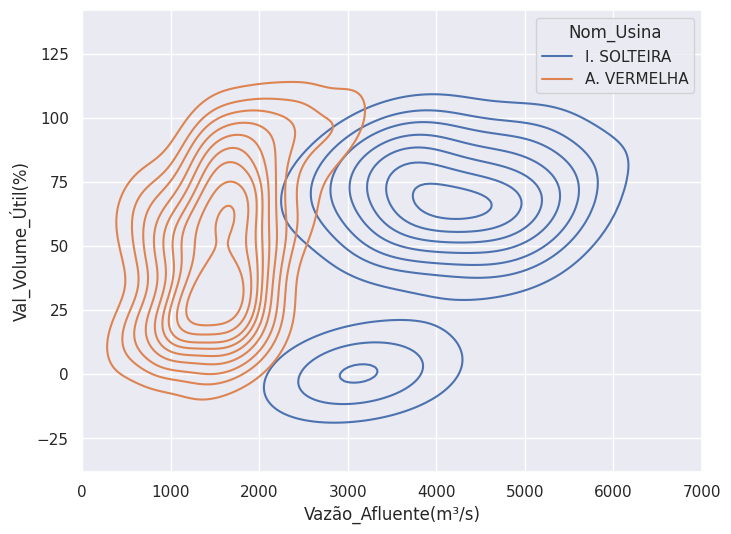

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Set up the figure with a reasonable size, e.g., 8x6 inches
f, ax = plt.subplots(figsize=(8, 6))

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=dataset_pergunta_4,
    x="Vazão_Afluente(m³/s)",
    y="Val_Volume_Útil(%)",
    hue="Nom_Usina",
    thresh=.1,
)

# Limit the x-axis to the range up to 8000
ax.set_xlim(0, 7000)

# Optionally, you can save the plot to a file with a specified DPI
# plt.savefig("my_plot.png", dpi=300)

# Show the plot
plt.show()

O gráfico acima mostra a densidade dos registros dos valores para as duas usinas e podemos entender que a usina "A.Vermelha" trabalha com maior frequência com o volume útil de àgua em seu reservatório de 25 à 50% e vazão afluente em torno de 1500 m³/s. Já a usina "I.Solteira" trabalha com maior frequência com o seu reservatório em torno de 70% com vazão afluente em torno 4000 m³/s.
O círculo azul na parte inferior referente à usina de "I.Solteria" é representado pela época de seca em que o volume útil do reservatório da usina chegou à zero, ou seja, a usina não tinha o volume mínimo necessário de água para gerar energia, esse fato ocorreu mais especificamente nos anos de 2015 e 2022 na bacia do Rio Paraná.

#### 7.2.5.Solução Pergunta 05

**Preparação do dataset**

In [0]:
df_pergunta_5_1 =  df_pergunta_4_2_spark[
    (df_pergunta_4_2_spark['Nom_Usina'] == 'TUCURUI')
]

df_pergunta_5_2 =  df_pergunta_4_3_spark[
    (df_pergunta_4_3_spark['Nom_Usina'] == 'TUCURUI')
]

In [0]:
dataset_Pergunta_5 = pd.merge(df_pergunta_5_1, df_pergunta_5_2, on=['Nom_Usina', 'Data'])

In [0]:
# Substitua as vírgulas por pontos nas colunas relevantes
dataset_Pergunta_5['Val_Volume_Útil(%)'] = dataset_Pergunta_5['Val_Volume_Útil(%)'].str.replace(',', '.')
dataset_Pergunta_5['Val_Nivel_montante(m)'] = dataset_Pergunta_5['Val_Nivel_montante(m)'].str.replace(',', '.')

# Converta os atributos para float
dataset_Pergunta_5['Val_Volume_Útil(%)'] = dataset_Pergunta_5['Val_Volume_Útil(%)'].astype(float)
dataset_Pergunta_5['Val_Nivel_montante(m)'] = dataset_Pergunta_5['Val_Nivel_montante(m)'].astype(float)

**Solução pergunta 05:** Considerando a usina de Tucurui mostre como se relaciona os dados de volume útil do reservatório e a altura do nível de água do reservatório. Mostre a densidade dos registros.

Text(0.5, 1.2, 'Gráfico da densidade do volume útil do reservatório de Tucurui e a altura do reservatório')

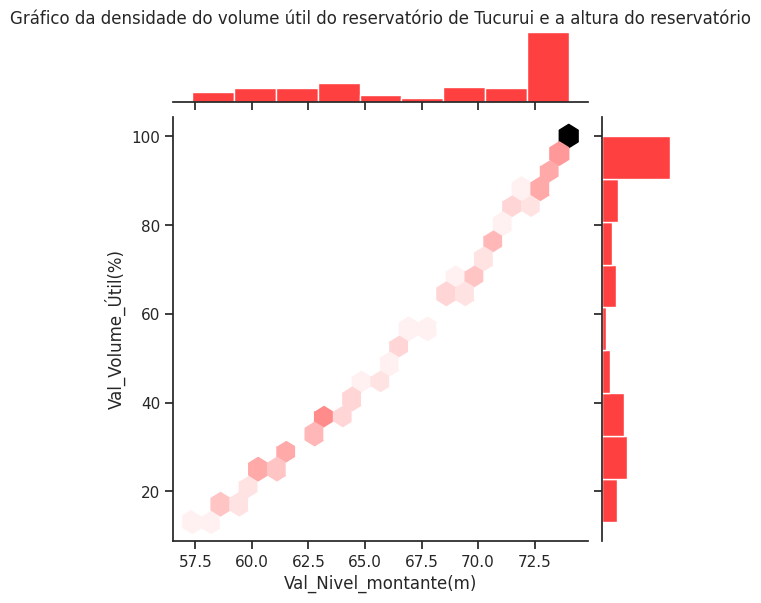

In [0]:
# Criação do gráfico "Hexbin plot" da biblioteca do Seaborn
sns.set_theme(style="ticks")
sns.jointplot(data=dataset_Pergunta_5, x="Val_Nivel_montante(m)", y="Val_Volume_Útil(%)", kind="hex", gridsize=20, color="red")
# Título do gráfico
plt.title("Gráfico da densidade do volume útil do reservatório de Tucurui e a altura do reservatório", y=1.2)

O gráfico acima apresenta uma série de informações sobre a usina de Tucuruí, uma delas é que para a usina chegar em 100% do volume útil, a altura do reservatório chega a 73 metros. Quando o volume útil do reservatório está abaixo de 20%, o volume do reservatório é em torno de 57%. Analisando também a densidade dos dados, pode-se perceber que é uma usina que costuma ficar na maior parte do tempo perto da sua capacidade máxima de volume de reservatório. Sendo uma das maiores usinas do mundo e a segunda maior do Brasil, perdendo apenas para a usina de Itaipu, tendo a vantagem de ser 100% brasileira.

### 7.3.Armazenamento dos Datasets Criados.

Após criar os datasets que permitem responder às perguntas propostas, é uma boa prática salvar o dataset no catálogo do databricks para que se possa visualizar os dados obtidos de forma mais prática, conforme executado no código abaixo e ilustrado na imagem abaixo:

In [0]:
# Importe o SparkSession do pyspark.sql
from pyspark.sql import SparkSession

# Crie uma sessão Spark
spark = SparkSession.builder.appName("SalvarDataset").getOrCreate()

# Converta o DataFrame Pandas para um DataFrame Spark
df_spark_1 = spark.createDataFrame(df_pergunta_01)
df_spark_2 = spark.createDataFrame(df_pergunta_2)
df_spark_3 = spark.createDataFrame(dataset_pergunta_3)
df_spark_4 = spark.createDataFrame(dataset_pergunta_4)
df_spark_5 = spark.createDataFrame(dataset_Pergunta_5)

# Salve o DataFrame Spark como uma tabela no catálogo do Databricks
df_spark_1.write.format("parquet").saveAsTable("dataset_Pergunta_1")
df_spark_2.write.format("parquet").saveAsTable("dataset_Pergunta_2")
df_spark_3.write.format("parquet").saveAsTable("dataset_Pergunta_3")
df_spark_4.write.format("parquet").saveAsTable("dataset_Pergunta_4")
df_spark_5.write.format("parquet").saveAsTable("dataset_Pergunta_5")


---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1028041126302264>, line 15
     12 df_spark_5 = spark.createDataFrame(dataset_Pergunta_5)
     14 # Salve o DataFrame Spark como uma tabela no catálogo do Databricks
---> 15 df_spark_1.write.format("parquet").saveAsTable("dataset_Pergunta_1")
     16 df_spark_2.write.format("parquet").saveAsTable("dataset_Pergunta_2")
     17 df_spark_3.write.format("parquet").saveAsTable("dataset_Pergunta_3")

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:1586, i

![imagem](/files/tables/catalogo_criado.jpg)

## 8.Autoavaliação 

### 8.1.Qualidade dos Dados e Dificuldades Encontradas


Inicialmente foi testado a plataforma da AWS para realizar este projeto, porém, foi observado que para atingir os objetivos propostos nesse trabalho o valor oferecido de forma gratuita pela plataforma não seria o suficiente, dessa maneira, foi optado por realizar todo o trabalho no Microsoft Azure.

Os dados extraídos do portal do ONS apresentam alta qualidade, porém, ao extraí-los foi observado que muitos atributos vinham com redundância, como por exemplo, duas colunas para informar a data de determinado registro, um com formato "dd/mm/yyyy" e outro com formato "dd/mm/yyyy hh/mm" além de algumas colunas que estavam totalmente nulas. 

Houve dificuldade para utilizar a ferramenta de catalogo do databricks para inserir um comentário que descrevese cada atributo, seria necessário uma permissão de usuário para realizar os comentários. A solução criada foi descrever os atributos no próprio notebook utiliando o Markdown (item 4.0)

Ao analisar os dados no notebook criado no databricks, também foi observado que alguns datasets gerados no data factory apresentavam erros para visualização, algumas vezes sendo necessário redefinir novamente que determinado atributo era um "float" ao invés de uma "string", ou também, houve casos em que foi necessário  substituir valores em "," para ".". Esses problemas foram resolvidos no próprio Data Factory ou utilizando as bibliotecas python no notebook gerado. 

Ao inserir os datasets no notebook criado no databricks, houve dificuldade na visualização dos dados, foi optado por alterar o formato de spark para a biblioteca pandas, onde diversos problemas foram resolvidos de forma mais simples.

Uma proposta para um trabalho futuro seria a criação de um dataset único juntando todas as tabelas usadas como base para responder às perguntas feitas nesse projeto, o resultado seria um notebook mais resumido e mais objetivo.